(720, 1280, 3)
slide_window
[0, 1280] [350, 720]
(1280, 370)
[32 32]
[39 10]


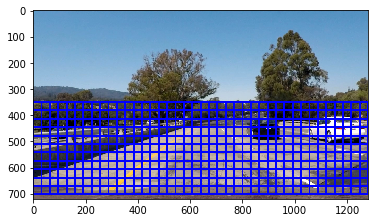

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


image = mpimg.imread('test_images/test1.jpg')
print(image.shape)

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    print("slide_window")
    print(x_start_stop, y_start_stop)
    # Compute the span of the region to be searched
    span = (x_start_stop[1]-x_start_stop[0], y_start_stop[1]-y_start_stop[0])
    print(span)
    # Compute the number of pixels per step in x/y
    pixels_per_step = np.multiply(xy_window, xy_overlap).astype(np.int)
    print(pixels_per_step)
    # Compute the number of windows in x/y
    windows = np.divide(np.subtract(span, xy_window), pixels_per_step).astype(np.int) + 1
    print(windows)
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    #     Note: you could vectorize this step, but in practice
    #     you'll be considering windows one by one with your
    #     classifier, so looping makes sense
        # Calculate each window position
        # Append window position to list
    for w in range(windows[0]*windows[1]):
        x1 = w % windows[0]*pixels_per_step[0]
        y1 = w // windows[0]*pixels_per_step[1]
        window_list.append(((x1+x_start_stop[0], y1+y_start_stop[0]), 
                            (x1+xy_window[0]+x_start_stop[0], y1+xy_window[1]+y_start_stop[0])))
    # Return the list of windows
    return window_list

y_start_stop = [350, 720] # Min and max in y to search in slide_window()

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

In [14]:
(720-128)/64+1

10.25